In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [2]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


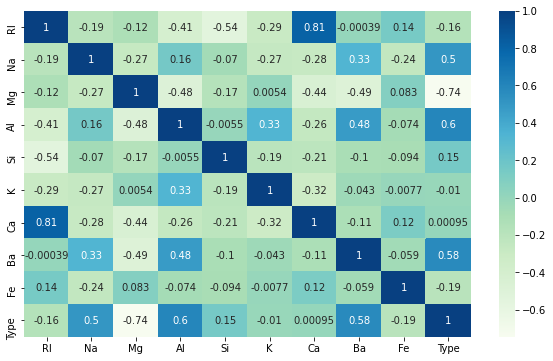

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='GnBu')
plt.show()

In [5]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Type"] = le.fit_transform(df["Type"])
df["Type"].value_counts()

1    76
0    70
5    29
2    17
3    13
4     9
Name: Type, dtype: int64

In [7]:
X = df.drop("Type",axis=1)
y = df["Type"]

In [8]:
pc = PCA(n_components=2,random_state=1)
components = pc.fit_transform(X,y)

In [9]:
pc1 = components[:,0]
pc2 = components[:,1]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


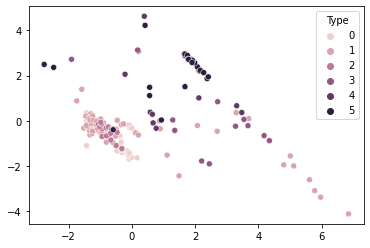

In [10]:
sns.scatterplot(pc1,pc2,hue=y)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [12]:
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [13]:
model = Sequential()
model.add(Dense(256, input_dim=9, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(6, activation="softmax"))
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy")

trained_model = model.fit(X_train_ss,y_train,epochs=80)

Epoch 1/80
5/5 [==============================] - 1s 5ms/step - loss: 1.7242
Epoch 2/80
5/5 [==============================] - 0s 5ms/step - loss: 1.4487
Epoch 3/80
5/5 [==============================] - 0s 5ms/step - loss: 1.2162
Epoch 4/80
5/5 [==============================] - 0s 5ms/step - loss: 1.0286
Epoch 5/80
5/5 [==============================] - 0s 4ms/step - loss: 0.8629
Epoch 6/80
5/5 [==============================] - 0s 4ms/step - loss: 0.7460
Epoch 7/80
5/5 [==============================] - 0s 4ms/step - loss: 0.6952
Epoch 8/80
5/5 [==============================] - 0s 5ms/step - loss: 0.6303
Epoch 9/80
5/5 [==============================] - 0s 4ms/step - loss: 0.5513
Epoch 10/80
5/5 [==============================] - 0s 5ms/step - loss: 0.5339
Epoch 11/80
5/5 [==============================] - 0s 5ms/step - loss: 0.4740
Epoch 12/80
5/5 [==============================] - 0s 5ms/step - loss: 0.4583
Epoch 13/80
5/5 [==============================] - 0s 6ms/step - loss: 0.

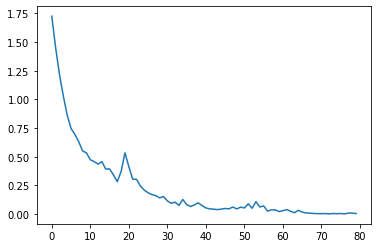

In [14]:
plt.plot(trained_model.history['loss'])

In [15]:
y_pred = model.predict(X_test_ss)
y_pred = np.argmax(y_pred,axis=1)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.81      0.81      0.81        21
           2       0.75      0.43      0.55         7
           3       0.67      1.00      0.80         2
           4       0.50      1.00      0.67         1
           5       0.90      1.00      0.95         9

    accuracy                           0.82        65
   macro avg       0.74      0.85      0.77        65
weighted avg       0.82      0.82      0.81        65

